<a href="https://colab.research.google.com/github/amzker/ML-Algorithms-From-Scratch/blob/main/Regression/chapter_02/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polynomial Regression


**For one variable**

$n = 3 $
$$ Y = m_1x^1 + m_2 x^2 + m_3 x^3........m_n x^n + C  $$

**For multiple Variable**

lets say $x_1$ and $x_2$,$n = 2$
$$ Y = [(m_1x_1^1\overset{Variable X1}+m_2x_1^2 ) + (m_3 x_2^1 \overset{Variable X2}+ m_4 x_2^2)+(x_1x_2)] + C $$

$x_1,x_2,x_3 , n =2 $

$$ Y = (m_1x_1^1 + m_2x_1^2) + (m_3x_2^1 + m_4x_2^2) + (m_5x_3^1 + m_6x_3^2) + (x_1x_2) + (x_1x_3) + (x_2x_3) + C
$$

## Finding coefficients and intercept

Same as before as this is multivariable regression, we just need to change in X not in equation, so

Matrix Direct

$$β= \frac{X^TY}{X^TX}$$

Gradeint Descent (on MSE)

where,   
$error=y-βX-C$


lr = learning rate


$$∂β= \frac{-2}{len(X)}  X^T(error)$$
$$$$
$$∂c = -2 * mean(error)$$

$$β = β - (∂β * lr)$$
$$c = c - (∂c * lr)$$


In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Hidden

In [12]:
np.random.seed(42)
def true_function(x):
    return 2 * x**3 - x**2 + 0.5 * x + 2
x_true = np.linspace(-5, 5, 100)
y_true = true_function(x_true)
noise = np.random.normal(0, 5, size=len(x_true))

y_noisy = y_true + noise

# DATA

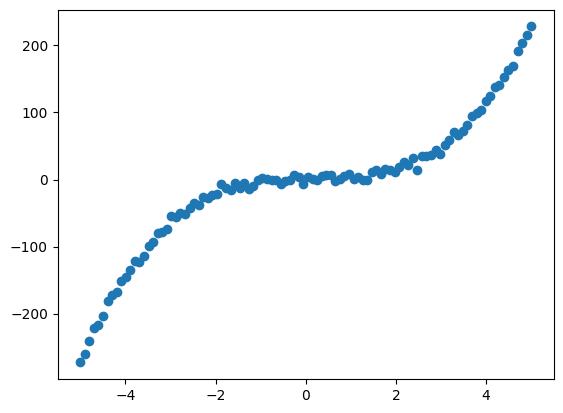

In [13]:
plt.scatter(x_true,y_noisy)

polynomial feature code

In [14]:
def polyrise(X, degree, interactions=True):
  newx = np.asarray(X)

  if newx.ndim == 1:
      newx = newx.reshape(-1, 1)
  X_poly = newx.copy()

  for i in range(2, degree + 1):
      X_poly = np.append(X_poly, newx ** i, axis=1)

  if interactions:
      for i in range(newx.shape[1]):
          for j in range(i + 1, newx.shape[1]):
              interx = newx[:, i] * newx[:, j]
              X_poly = np.append(X_poly, interx.reshape(-1, 1), axis=1)
  return X_poly

# MODEL BASIC

In [22]:
class MD:

  def __init__(self):
    self.beta = None
    self.c = None
    self.degree = None
    self.mean = None
    self.std = None
    self.mse = []
    self.itr = []

  def polyrise(self, X, degree, interactions=True):
    newx = np.asarray(X)

    if newx.ndim == 1:
        newx = newx.reshape(-1, 1)
    X_poly = newx.copy()

    for i in range(2, degree + 1):
        X_poly = np.append(X_poly, newx ** i, axis=1)

    if interactions:
        for i in range(newx.shape[1]):
            for j in range(i + 1, newx.shape[1]):
                interx = newx[:, i] * newx[:, j]
                X_poly = np.append(X_poly, interx.reshape(-1, 1), axis=1)
    return X_poly

  def normalize(self, X):
    smallvalue = 1e-10

    X = (X - self.mean) / (self.std + smallvalue)
    return X

  def fit(self, X, y, lr=0.01, epochs=100, degree=1,interactions=True):
    self.degree = degree

    X_poly = self.polyrise(X, degree, interactions)
    y = np.asarray(y)
    if y.ndim == 1:
      y = y.reshape(-1,1)

    n_samples, n_features = X_poly.shape
    n_outputs = y.shape[1]
    self.beta = np.zeros((n_features, n_outputs))
    self.c = np.zeros(n_outputs)
    self.mean = np.mean(X_poly, axis=0)
    self.std = np.std(X_poly, axis=0)
    X_norm = self.normalize(X_poly)

    for i in range(epochs):
        self.itr.append(i)
        pred = X_norm.dot(self.beta) + self.c
        error = y - pred
        self.mse.append(np.mean(np.absolute(error)))
        db = -2 / len(X_norm) * X_norm.T.dot(error)
        dc = (-2) * np.mean(error, axis=0)
        self.beta = self.beta - (lr * db)
        self.c = self.c - (lr * dc)
    return self

  def predict(self, X):
    if self.beta is None or self.c is None:
        raise RuntimeError("Model has not been trained. Please call model.fit() before model.predict().")
    X_poly = self.polyrise(X, self.degree)
    X_norm = self.normalize(X_poly)
    return X_norm.dot(self.beta) + self.c

# Plottting function

In [23]:
def plot_graphs(x, y_true, model):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  ax1.scatter(x, y_true, color="yellow", label="True Data")
  ax1.plot(x, model.predict(x), color="red", label="Model Prediction")
  ax1.set_xlabel("x")
  ax1.set_ylabel("y")
  ax1.set_title("True Data vs. our Model Prediction")
  ax1.legend()

  equation = f"y = {model.c}"
  for i, coeff in enumerate(model.beta):
      equation += f" + {coeff} * x^{i+1}"
  print(equation)

  ax2.plot(model.itr, model.mse)
  ax2.set_xlabel("Iterations")
  ax2.set_ylabel("MSE")
  ax2.set_title("Mean Squared Error our model")

  plt.tight_layout()
  plt.show()

# TRAINING

y = [-50.71602398] + [8.01152858] * x^1 + [-11.33032867] * x^2 + [34.87419453] * x^3 + [-16.74900531] * x^4 + [12.39403277] * x^5 + [-3.4223358] * x^6 + [-0.45132362] * x^7 + [3.05704122] * x^8 + [-3.37611219] * x^9 + [2.41832466] * x^10


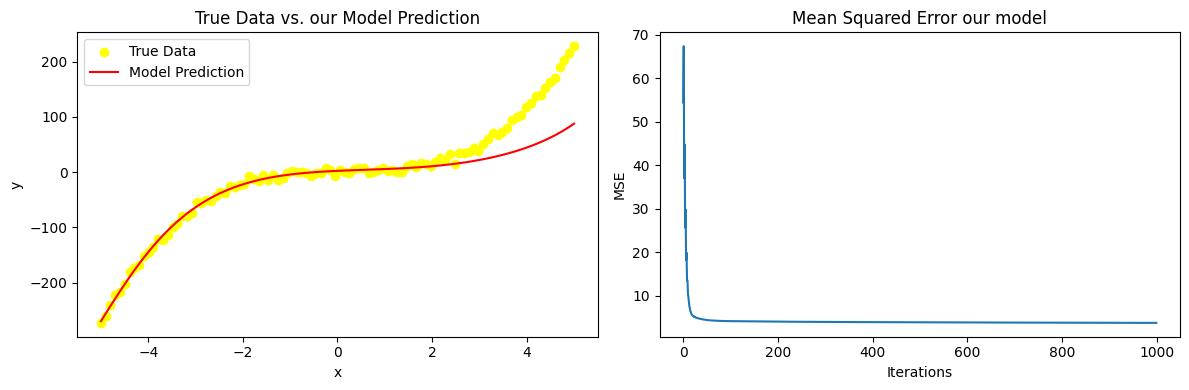

In [30]:
model = MD()
model.fit(x_true[:70],y_noisy[:70],0.1,1000,10,True)
plot_graphs(x_true,y_noisy,model)

# Problems

what are possible reasons?

1. model needs more train data
2. train data needs to be from every strata or stratum or simply shuffled
3. complexity is high
4. data has fixed equation, so identifying degree will be optimization point
    a. how do we know that data has fixed equation?
        - model fitting severly affects depending on degree
        - in graphical representation most of data follows common line , and outliers can be seen directly
        - and by bit of experience or data analysis

5. model has trained now it is training on noise, early stopping required ( not here tho)
6. learning rate is not optimum
7. bias and variance trade of

#Let's solve it

we can't just try all degrees right? we dont know anything about data equation, so we need something that can automatically remove unnessory features , yes gradeint descent is there but it will just manupulate betas to reach function minimum , so what can we do? we want to increase little error on training set so it does not overfit , but we need to adjust that error also as we also need to train properly


let's see our equation

$$MSE = mean(y_{actual} - β*c)^2$$

we can add litle error here so model dont fit wayy to much.


we can add regulator * magnitude/level of regulation need


like


alpha * sum(abs(β))


alpha = regulator


sum(abs(β)) will give us magnitude betas, like if it is more that means there
are more features and if it is less that means there are less features which are taking into account.
now if we add it into our function

$$MSE = ∑(y_{actual} - β*c)^2 + [alpha * ∑(abs(β))]  $$
and taking derivative respect to beta

$$ ∂β = -\frac{2}{n}  Σ X^T(y_{actual} - β*c) + [alpha * sign(β)] $$


sign will give us direction ( for positive values +1 , for zero 0 , for negative -1) . so we will have direction to remove and there is alpha which will helps us to regulate how much to remove


what i am saying is:

we want that our model should not overfit and basic solution is that to have optimum learning rate and degree of polynomial, but we can't just use random degree or try all degree to find out we need some sort of method which automatically removes unnecessary features right? well all i am saying is that we should add error now and then during training so it does not overfit on training set , but again we can't just add random errors. so let's think , how can we know model is training on more features or it is training in any sense? based on it's betas right? because all we are trying is to find perfect betas? , so let's look at beta can we do something here? , well what if we sum all betas (absolute values) , it will give us magnitude right? like if it more that means model is using more features and if it is less that means model is using less features and it is not more complex. and we can regulate it via alpha, so let's add this error into partial derivative of mse respect to beta. so now how adding error will cause drop of unnecessary features? it will actually cause error in all features but those features which has very low value will get rapidly lower to the zero

In [32]:
class POLY:

  def __init__(self):
    self.beta = None
    self.c = None
    self.degree = None
    self.mean = None
    self.std = None
    self.mse = []
    self.itr = []

  def polyrise(self, X, degree, interactions=True):
    newx = np.asarray(X)

    if newx.ndim == 1:
        newx = newx.reshape(-1, 1)
    X_poly = newx.copy()

    for i in range(2, degree + 1):
        X_poly = np.append(X_poly, newx ** i, axis=1)

    if interactions:
        for i in range(newx.shape[1]):
            for j in range(i + 1, newx.shape[1]):
                interx = newx[:, i] * newx[:, j]
                X_poly = np.append(X_poly, interx.reshape(-1, 1), axis=1)
    return X_poly

  def normalize(self, X):
    smallvalue = 1e-10

    X = (X - self.mean) / (self.std + smallvalue)
    return X

  def fit(self, X, y, lr=0.01, epochs=100, degree=1,interactions=True,alpha=0.01):
    self.degree = degree

    X_poly = self.polyrise(X, degree, interactions)
    y = np.asarray(y)
    if y.ndim == 1:
      y = y.reshape(-1,1)

    n_samples, n_features = X_poly.shape
    n_outputs = y.shape[1]
    self.beta = np.zeros((n_features, n_outputs))
    self.c = np.zeros(n_outputs)
    self.mean = np.mean(X_poly, axis=0)
    self.std = np.std(X_poly, axis=0)
    X_norm = self.normalize(X_poly)

    for i in range(epochs):
        self.itr.append(i)
        pred = X_norm.dot(self.beta) + self.c
        error = y - pred
        self.mse.append(np.mean(np.absolute(error)))
        db = -2 / len(X_norm) * X_norm.T.dot(error)

        lasso = alpha * np.sign(self.beta)
        db = db + lasso

        dc = (-2) * np.mean(error, axis=0)
        self.beta = self.beta - (lr * db)
        self.c = self.c - (lr * dc)
    return self

  def predict(self, X):
    if self.beta is None or self.c is None:
        raise RuntimeError("Model has not been trained. Please call model.fit() before model.predict().")
    X_poly = self.polyrise(X, self.degree)
    X_norm = self.normalize(X_poly)
    return X_norm.dot(self.beta) + self.c

y = [-50.71602398] + [8.01176026] * x^1 + [-11.3323939] * x^2 + [34.87165317] * x^3 + [-16.74866095] * x^4 + [12.39352127] * x^5 + [-3.42257314] * x^6 + [-0.45098886] * x^7 + [3.05663215] * x^8 + [-3.37585646] * x^9 + [2.41831217] * x^10


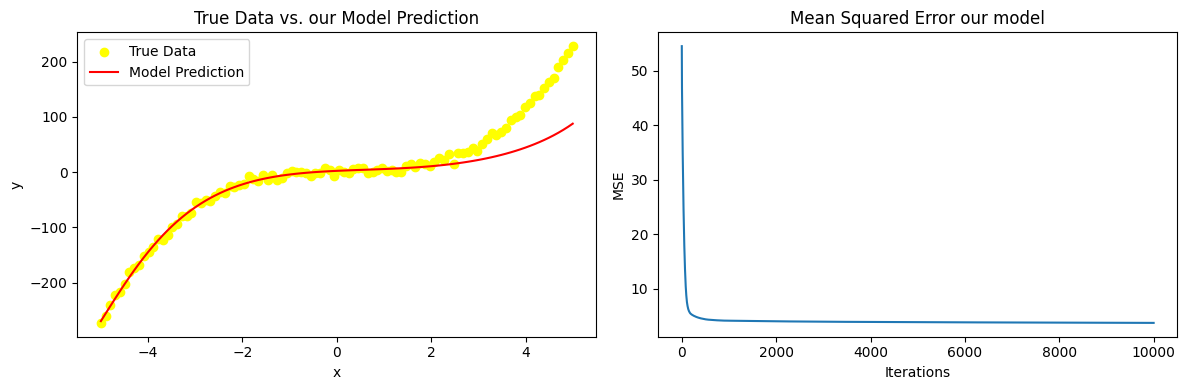

y = [-50.71602398] + [1.08222813] * x^1 + [-11.97361025] * x^2 + [57.30184967] * x^3 + [-0.87962818] * x^4 + [0.1351513] * x^5 + [-0.06016161] * x^6 + [0.08882267] * x^7 + [-0.04432856] * x^8 + [0.04922447] * x^9 + [-0.02083147] * x^10


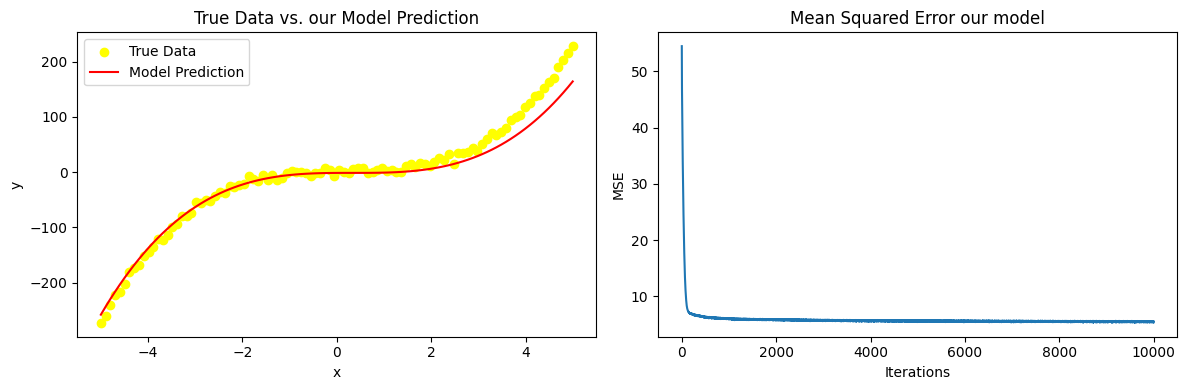

In [35]:
model = MD()
model2 = POLY()

model.fit(x_true[:70],y_noisy[:70],0.01,10000,10,True)
model2.fit(x_true[:70],y_noisy[:70],0.01,10000,10,True,10)

plot_graphs(x_true,y_noisy,model)
plot_graphs(x_true,y_noisy,model2)

# IN DEPTH ANALYSIS

let's look at all beta values

In [44]:
class MD2:

  def __init__(self):
      self.beta = None
      self.c = None
      self.degree = None
      self.mean = None
      self.std = None
      self.mse = []
      self.itr = []
      self.betas = []

  def polyrise(self, X, degree, interactions=True):
      newx = np.asarray(X)

      if newx.ndim == 1:
          newx = newx.reshape(-1, 1)
      X_poly = newx.copy()

      for i in range(2, degree + 1):
          X_poly = np.append(X_poly, newx ** i, axis=1)

      if interactions:
          for i in range(newx.shape[1]):
              for j in range(i + 1, newx.shape[1]):
                  interx = newx[:, i] * newx[:, j]
                  X_poly = np.append(X_poly, interx.reshape(-1, 1), axis=1)
      return X_poly

  def normalize(self, X):
      smallvalue = 1e-10

      X = (X - self.mean) / (self.std + smallvalue)
      return X

  def fit(self, X, y, lr=0.01, epochs=100, degree=1,interactions=True):
      self.degree = degree

      X_poly = self.polyrise(X, degree, interactions)
      y = np.asarray(y)
      if y.ndim == 1:
        y = y.reshape(-1,1)

      n_samples, n_features = X_poly.shape
      n_outputs = y.shape[1]
      self.beta = np.zeros((n_features, n_outputs))
      self.c = np.zeros(n_outputs)
      self.mean = np.mean(X_poly, axis=0)
      self.std = np.std(X_poly, axis=0)
      X_norm = self.normalize(X_poly)

      for i in range(epochs):
          self.itr.append(i)
          pred = X_norm.dot(self.beta) + self.c
          error = y - pred
          self.betas.append(self.beta)
          self.mse.append(np.mean(np.absolute(error)))
          db = -2 / len(X_norm) * X_norm.T.dot(error)
          dc = (-2) * np.mean(error, axis=0)
          self.beta = self.beta - (lr * db)
          self.c = self.c - (lr * dc)
      return self

  def predict(self, X):
      if self.beta is None or self.c is None:
          raise RuntimeError("Model has not been trained. Please call model.fit() before model.predict().")
      X_poly = self.polyrise(X, self.degree)
      X_norm = self.normalize(X_poly)
      return X_norm.dot(self.beta) + self.c

In [37]:
class POLY2:

  def __init__(self):
      self.beta = None
      self.c = None
      self.degree = None
      self.mean = None
      self.std = None
      self.mse = []
      self.betas = []
      self.itr = []


  def polyrise(self, X, degree, interactions=True):
      newx = np.asarray(X)

      if newx.ndim == 1:
          newx = newx.reshape(-1, 1)
      X_poly = newx.copy()

      for i in range(2, degree + 1):
          X_poly = np.append(X_poly, newx ** i, axis=1)

      if interactions:
          for i in range(newx.shape[1]):
              for j in range(i + 1, newx.shape[1]):
                  interx = newx[:, i] * newx[:, j]
                  X_poly = np.append(X_poly, interx.reshape(-1, 1), axis=1)
      return X_poly

  def normalize(self, X):
      smallvalue = 1e-10

      X = (X - self.mean) / (self.std + smallvalue)
      return X

  def fit(self, X, y, lr=0.01, epochs=100, degree=1,interactions=True,alpha=0.01):
      self.degree = degree

      X_poly = self.polyrise(X, degree, interactions)
      y = np.asarray(y)
      if y.ndim == 1:
        y = y.reshape(-1,1)

      n_samples, n_features = X_poly.shape
      n_outputs = y.shape[1]
      self.beta = np.zeros((n_features, n_outputs))
      self.c = np.zeros(n_outputs)
      self.mean = np.mean(X_poly, axis=0)
      self.std = np.std(X_poly, axis=0)
      X_norm = self.normalize(X_poly)

      for i in range(epochs):
          self.itr.append(i)
          pred = X_norm.dot(self.beta) + self.c
          error = y - pred
          self.betas.append(self.beta)
          self.mse.append(np.mean(np.absolute(error)))

          #∂β = −2/n Σ X.T(y−βX) +  α∗sign(β)

          db = -2 / len(X_norm) * X_norm.T.dot(error)
          lasso = alpha * np.sign(self.beta)
          db = db + lasso

          dc = (-2) * np.mean(error, axis=0)
          self.beta = self.beta - (lr * db)
          self.c = self.c - (lr * dc)
      return self

  def predict(self, X):
      if self.beta is None or self.c is None:
          raise RuntimeError("Model has not been trained. Please call model.fit() before model.predict().")
      X_poly = self.polyrise(X, self.degree)
      X_norm = self.normalize(X_poly)
      return X_norm.dot(self.beta) + self.c


In [38]:
def plot_depth_graph(model):
    betas = np.asarray(model.betas)
    mse = np.asarray(model.mse)

    num_features = betas.shape[1]
    num_iterations = betas.shape[0]

    num_rows = int(np.ceil(num_features / 2))
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 2 * num_rows))

    for i in range(num_features):
        row = i // 2
        col = i % 2
        axes[row, col].plot(betas[:, i], mse)
        axes[row, col].set_xlabel(f'Beta[{i+1}]')
        axes[row, col].set_ylabel('MSE')

    fig.suptitle('MSE vs. Beta')
    plt.tight_layout()
    plt.show()


y = [-3.71116365e+233] + [1.79731198e+249] * x^1 + [2.0836173e+249] * x^2 + [1.99163747e+249] * x^3 + [2.03105668e+249] * x^4 + [2.06415227e+249] * x^5 + [1.9923503e+249] * x^6 + [2.0989924e+249] * x^7 + [1.96738409e+249] * x^8 + [2.11962406e+249] * x^9 + [1.9510874e+249] * x^10 + [2.13301707e+249] * x^11 + [1.94013423e+249] * x^12


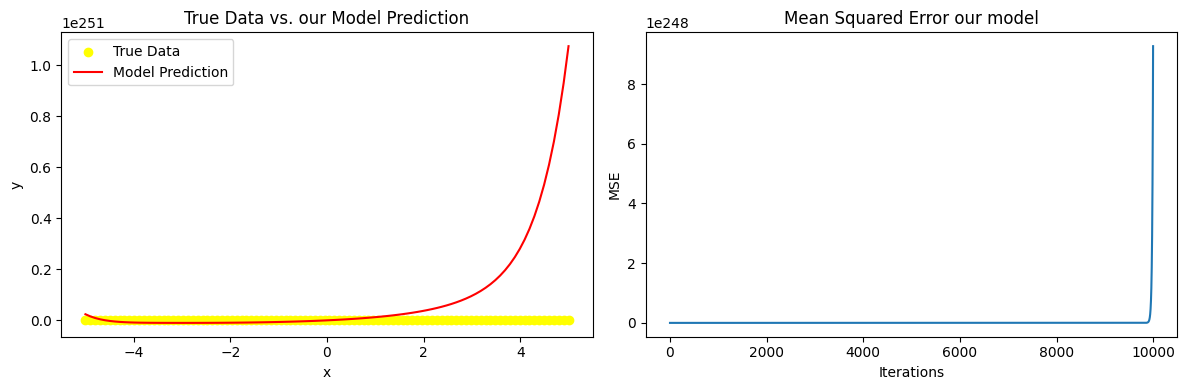

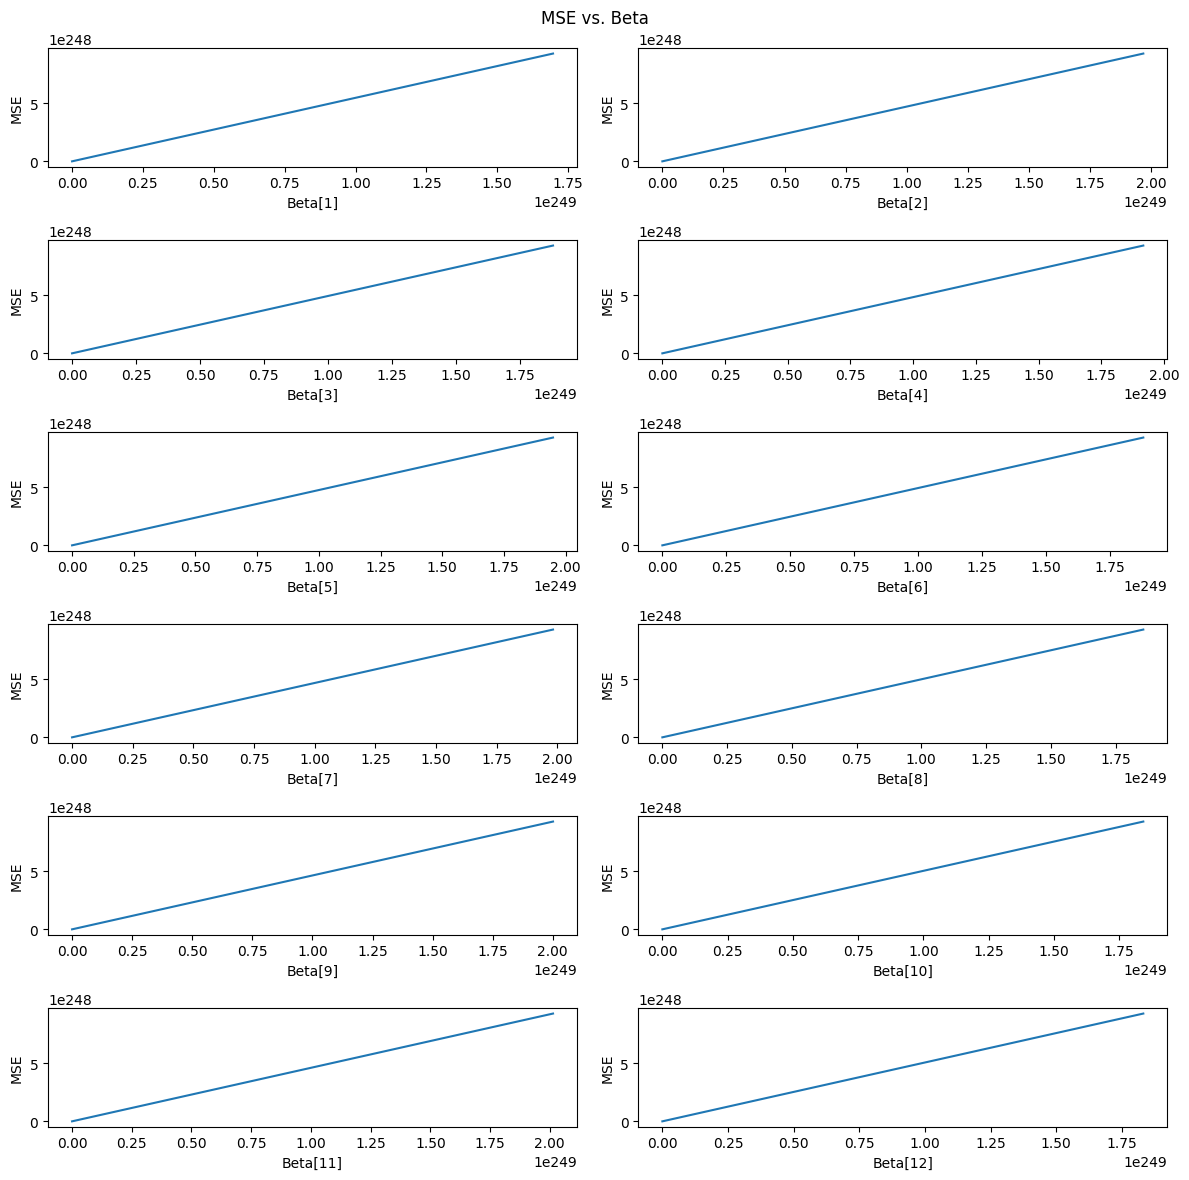

y = [-50.71602398] + [0.03267699] * x^1 + [-9.52675164] * x^2 + [58.55423989] * x^3 + [-0.16316628] * x^4 + [0.05567406] * x^5 + [-0.28036257] * x^6 + [0.25359019] * x^7 + [-0.17730113] * x^8 + [-0.02226466] * x^9 + [-0.26925247] * x^10 + [0.01958874] * x^11 + [-0.08793907] * x^12


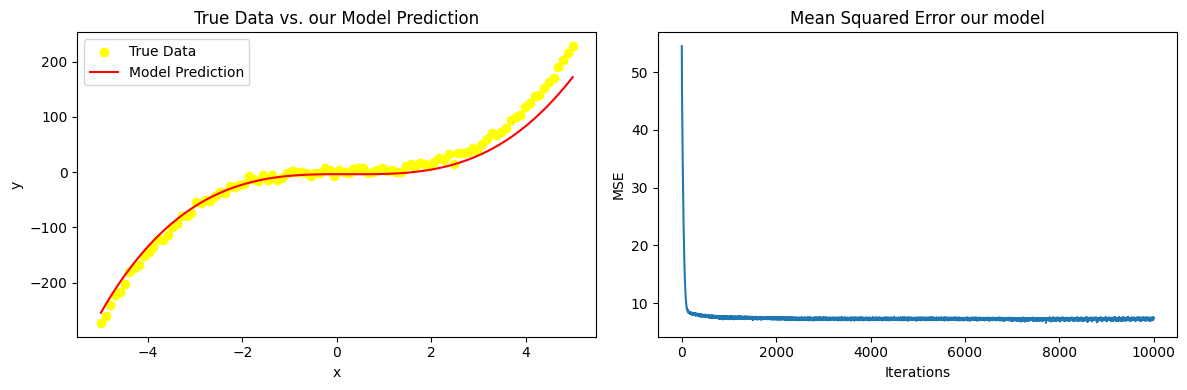

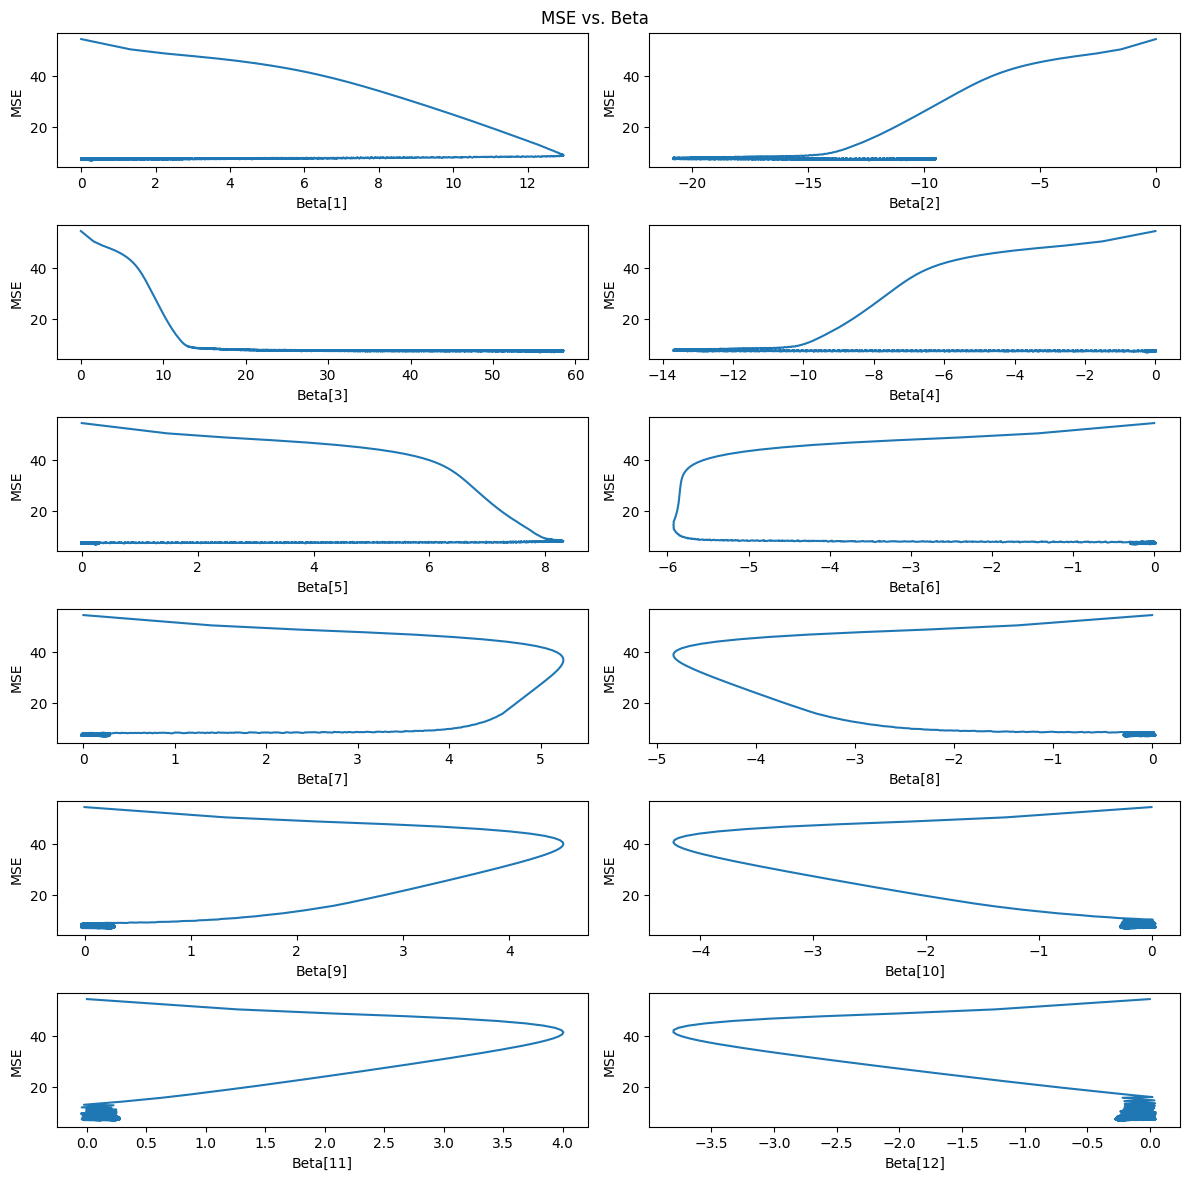

In [50]:
modelmd = MD2()
modelpoly = POLY2()

# modelmd.fit(x_true[:70],y_noisy[:70],0.01,10000,10,True)
# modelpoly.fit(x_true[:70],y_noisy[:70],0.01,10000,10,True,30)
modelmd.fit(x_true[:70],y_noisy[:70],0.01,10000,12,True)
modelpoly.fit(x_true[:70],y_noisy[:70],0.01,10000,12,True,15)

plot_graphs(x_true,y_noisy,modelmd)
plot_depth_graph(modelmd)


plot_graphs(x_true,y_noisy,modelpoly)
plot_depth_graph(modelpoly)

$$ MSE = ∑ (y_{actual} - βX)^2 $$


$$\partial\beta = -\frac{2}{n}\Sigma X^T(y - \beta X)$$


$$\partial\beta = -\frac{2}{n}\Sigma X^T(y - \beta X) + \alpha \Sigma (abs(\beta))$$

$$\partial\beta = -\frac{2}{n}\Sigma X^T(y - \beta X) + \alpha * {sign} (\beta)$$


$$ = \begin{bmatrix}
-1 \\
0.01332 \\
2.334 \\
\end{bmatrix}$$
